In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dataloader import DataLoader
from parser import Extractor
from helpers import df_maker

In [2]:
teachers = df_maker()
teachers.head(3)

,Name,Url,Table,NameAbbr,EngName,EngNameAbbr,LastName,EngLastName
0,Аббасов Меджид Эльхан оглы,https://apmath.spbu.ru/fakultet/spisok-i-rejti...,Математической теории микропроцессорных систем...,Аббасов М.Э.,Abbasov Medzhid El'han ogly,Abbasov M.E.,Аббасов,Abbasov
1,Александров Александр Юрьевич,https://apmath.spbu.ru/fakultet/spisok-i-rejti...,Управления медико-биологическими системами,Александров А.Ю.,Aleksandrov Aleksandr Jur'evich,Aleksandrov A.J.,Александров,Aleksandrov
2,Алисейко Алексей Николаевич,NaN,Теории управления,Алисейко А.Н.,Alisejko Aleksej Nikolaevich,Alisejko A.N.,Алисейко,Alisejko


In [38]:
teachers[teachers['LastName'] == 'Кузютин']

,Name,Url,Table,NameAbbr,EngName,EngNameAbbr,LastName,EngLastName
96,Кузютин Денис Вячеславович,https://apmath.spbu.ru/fakultet/spisok-i-rejti...,Математической теории игр и статистических реш...,Кузютин Д.В.,Kuzjutin Denis Vjacheslavovich,Kuzjutin D.V.,Кузютин,Kuzjutin


In [4]:
extractor = Extractor(teachers)
data = extractor.extract()
data

  0%|          | 0/213 [00:00<?, ?it/s]

100%|██████████| 213/213 [01:12<00:00,  2.92it/s]



{'Аббасов': ['Abbasov M. E., Sharlay A. S. Variational Approach for Finding the Cost-Optimal Trajectory // Math Models Comput Simul.\xa02024. Т. 16. Р. 293–301. https://doi.org/10.1134/S2070048224020030',
  'Аббасов\xa0М.\xa0Э., Шарлай А.\xa0С . Метод поиска оптимальной по\xa0стоимости траектории дороги на\xa0поверхности местности // Вестн. С.-Петербург. ун-та. Сер.\xa010. Прикл. матем. Информ. Проц. упр.\xa02023. Т. 19 (2). С. 139–147.',
  'Abbasov Majid E. Directional Differentiability, Coexhausters, Codifferentials and Polyhedral DC\xa0Functions // Taiwanese J. Math. Advance Publication\xa01. 2022. https://doi.org/10.11650/tjm/221201',
  'Abbasov Majid E. Finding the set of global minimizers of a piecewise affine function // Journal of Global Optimization. Springer, 2022.',
  'Аббасов М. Э., Шарлай А. С. Поиск оптимальной по стоимости строительства траектории дороги на рельефе местности // Вестн. С.-Петербург. ун-та. Сер. 10. Прикл. матем. Информ. Проц. упр. 2021. Т. 17 (1). С. 4–12

In [42]:
data['Петросян']

[]

In [37]:
relations = extractor.last_names()
relations['Марченко']

['Марченко', 'Панкратова']

In [17]:
from transliterate import translit

def normalize_relations(relations):
    new_relations = {}
    for author, names in relations.items():
        norm_names = set()
        for name in names:
            # Перевести на русский, если не кириллица
            if not any('А' <= ch <= 'я' or ch == 'ё' or ch == 'Ё' for ch in name):
                name_ru = translit(name, 'ru')
            else:
                name_ru = name
            norm_names.add(name_ru)
        # Удалить фамилию автора из списка
        norm_names.discard(author)
        new_relations[author] = list(norm_names)
    return new_relations

relations_normalized = normalize_relations(relations)
relations_normalized

{'Аббасов': ['Рычков', 'Буре'],
 'Александров': ['Степенко', 'Платонов', 'Жабко', 'Смирнов', 'Екимов'],
 'Алисейко': [],
 'Аллахвердян,': [],
 'Алферов': [],
 'Андреева': ['Бедрина', 'Егоров', 'Смирнова', 'Зубов'],
 'Андриянова': [],
 'Антонов': ['Буре', 'Вараюнь', 'Егоров'],
 'Бабушкин': [],
 'Балыкина': ['Екимов', 'Свиркин', 'Буре'],
 'Басков': [],
 'Башкиров': [],
 'Бедрина': ['Егоров',
  'Андреева',
  'Сергеев',
  'Куранов',
  'Клемешев',
  'Зубов',
  'Трофимов'],
 'Бикбулатов': [],
 'Билятдинов,': [],
 'Блеканов': ['Иванов'],
 'Богданов': [],
 'Бондаренко': [],
 'Бочкарёв': ['Греков', 'Новожилова', 'Бочкарев'],
 'Булгакова': [],
 'Буре': ['Парилина', 'Мазалов', 'Екимов', 'Якушев', 'Свиркин'],
 'Бусько': [],
 'Бутырский,': [],
 'Быкова,': [],
 'Вараюнь': ['Буре', 'Егоров', 'Виноградова', 'Антонов'],
 'Ведякова': [],
 'Виноградов': [],
 'Виноградова': ['Егоров'],
 'Владимирова': ['Рубцова'],
 'Власова': ['Лежнина', 'Смирнов'],
 'Вольф,': [],
 'Воронкова': [],
 'Вяльцева': [],
 'Гали

In [18]:
relations_normalized['Кривошеин']

['Скопина', 'Лебедева']

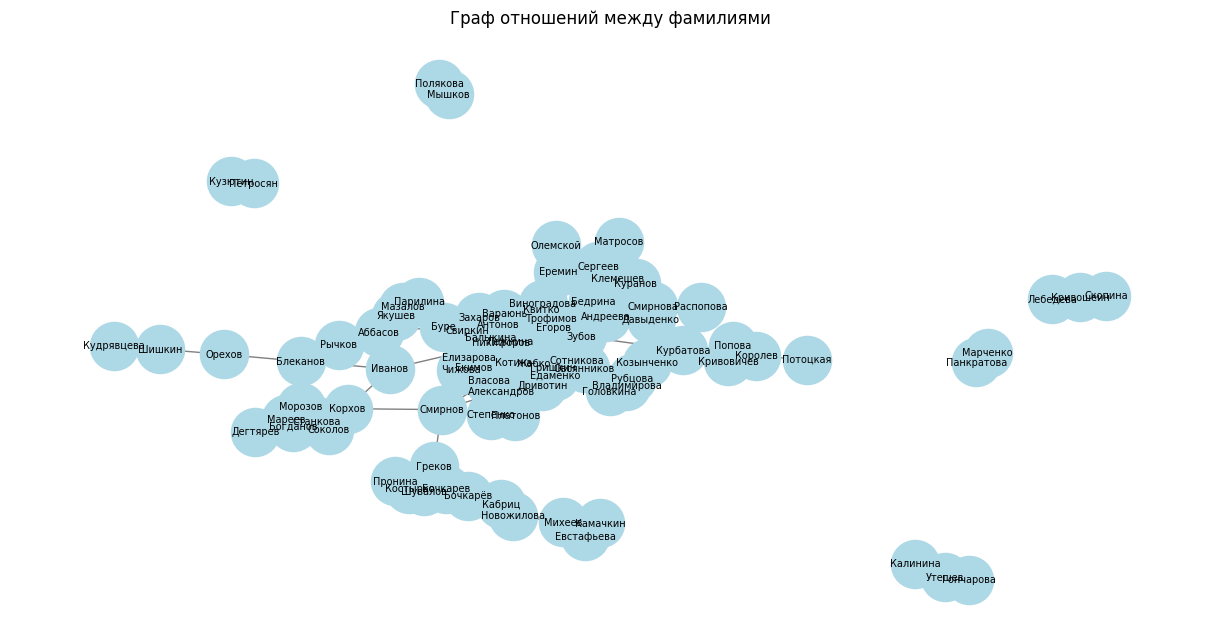

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for author, names in relations_normalized.items():
    for name in names:
        G.add_edge(author, name)

plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, seed=500)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=7)
plt.title('Граф отношений между фамилиями')
plt.show()

In [36]:
import json

# Сохраняем граф в формате node-link (удобно для JSON)
from networkx.readwrite import json_graph

graph_data = json_graph.node_link_data(G)
with open('relations_graph.json', 'w', encoding='utf-8') as f:
    json.dump(graph_data, f, ensure_ascii=False, indent=2)

print('Граф сохранён в relations_graph.json')

Граф сохранён в relations_graph.json
